In [31]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime

In [16]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 10, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


## Closing Price Analysis

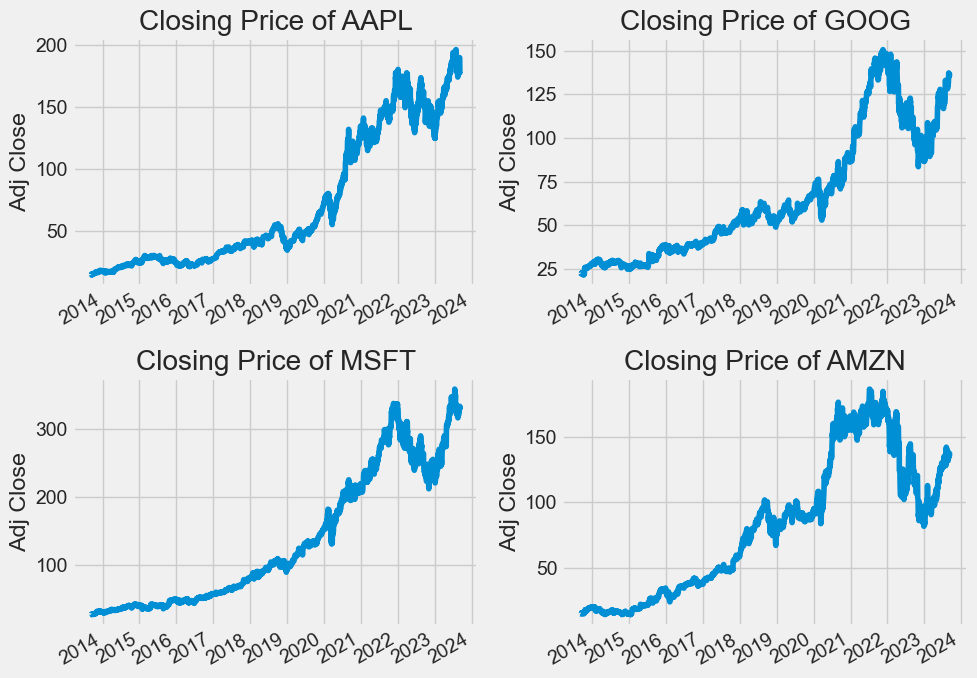

In [21]:
## historical view of the closing price
plt.figure(figsize=(10, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

## Simple Moving Average

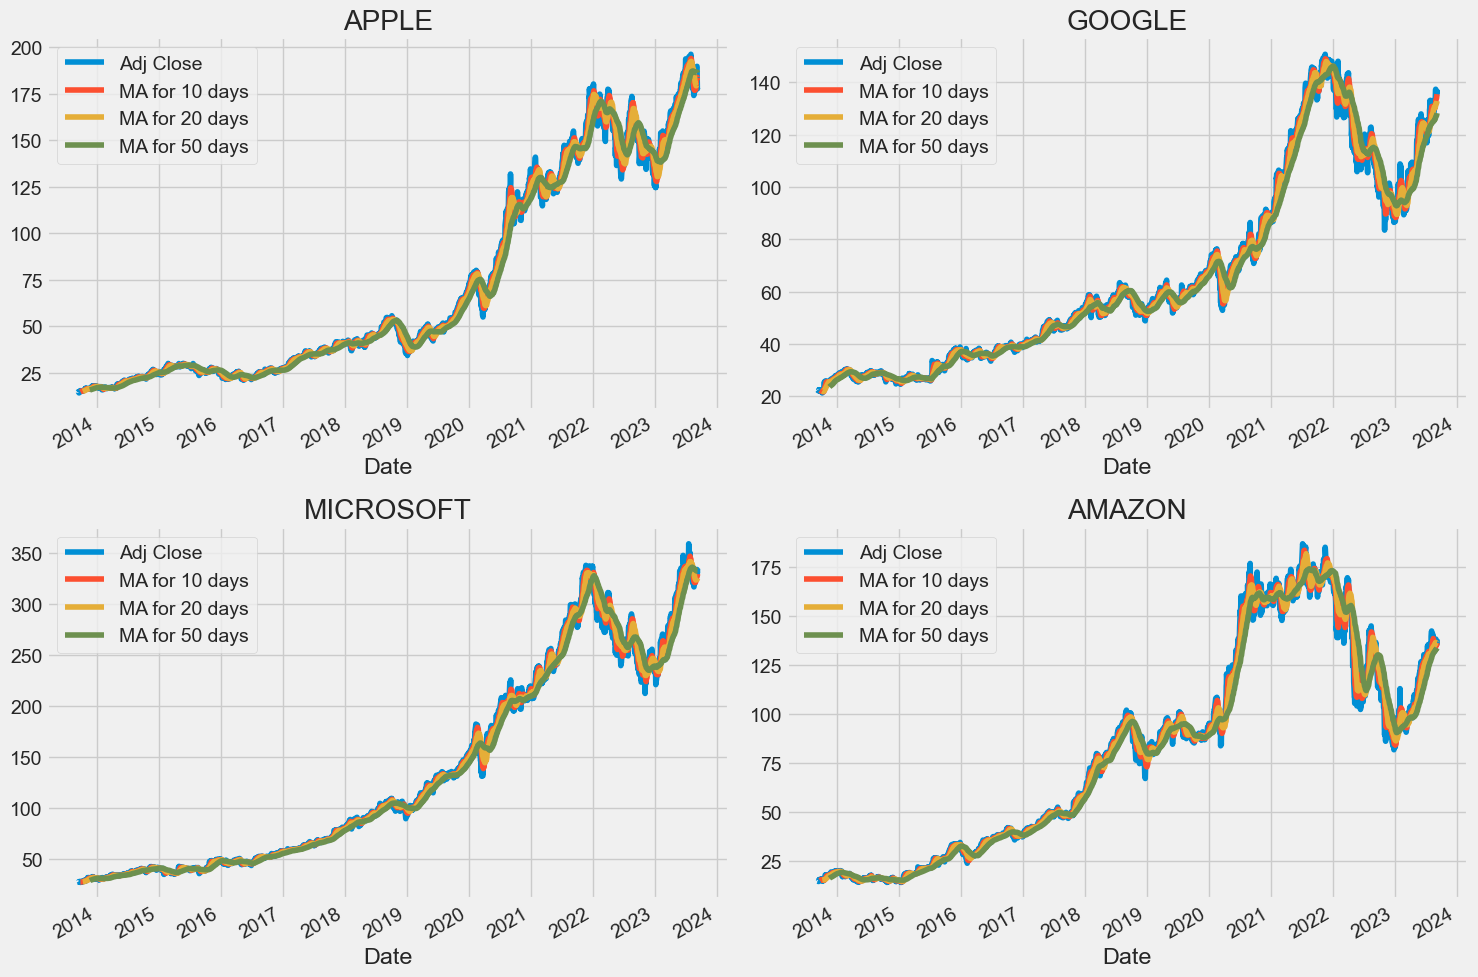

In [22]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

## Daily Returns On Stock (AVG)

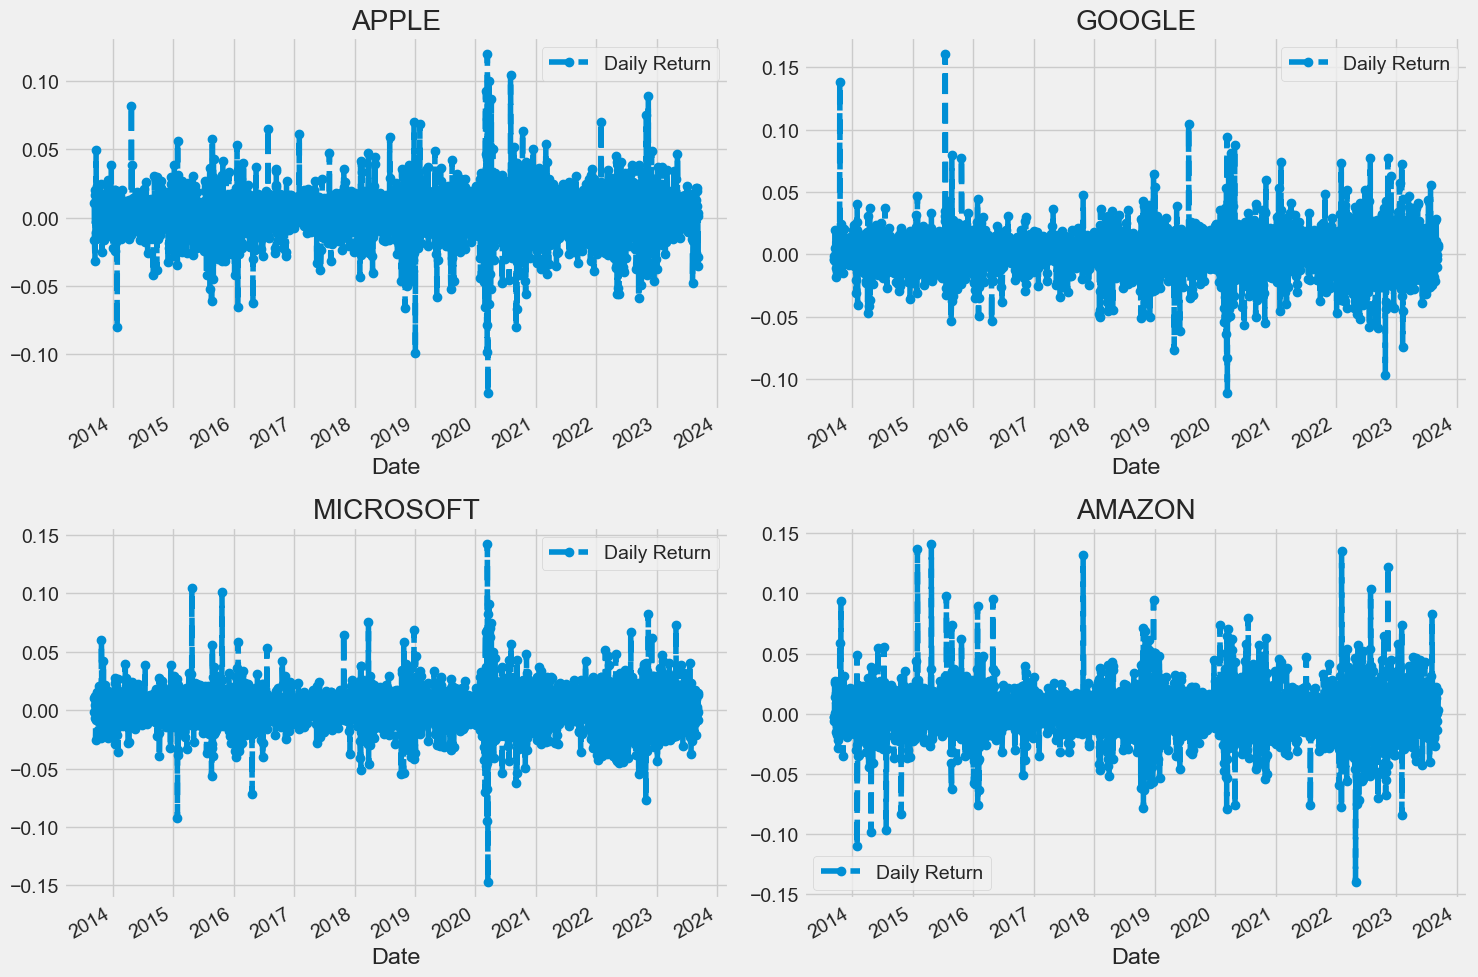

In [23]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

## Distribution Plot Of Returns

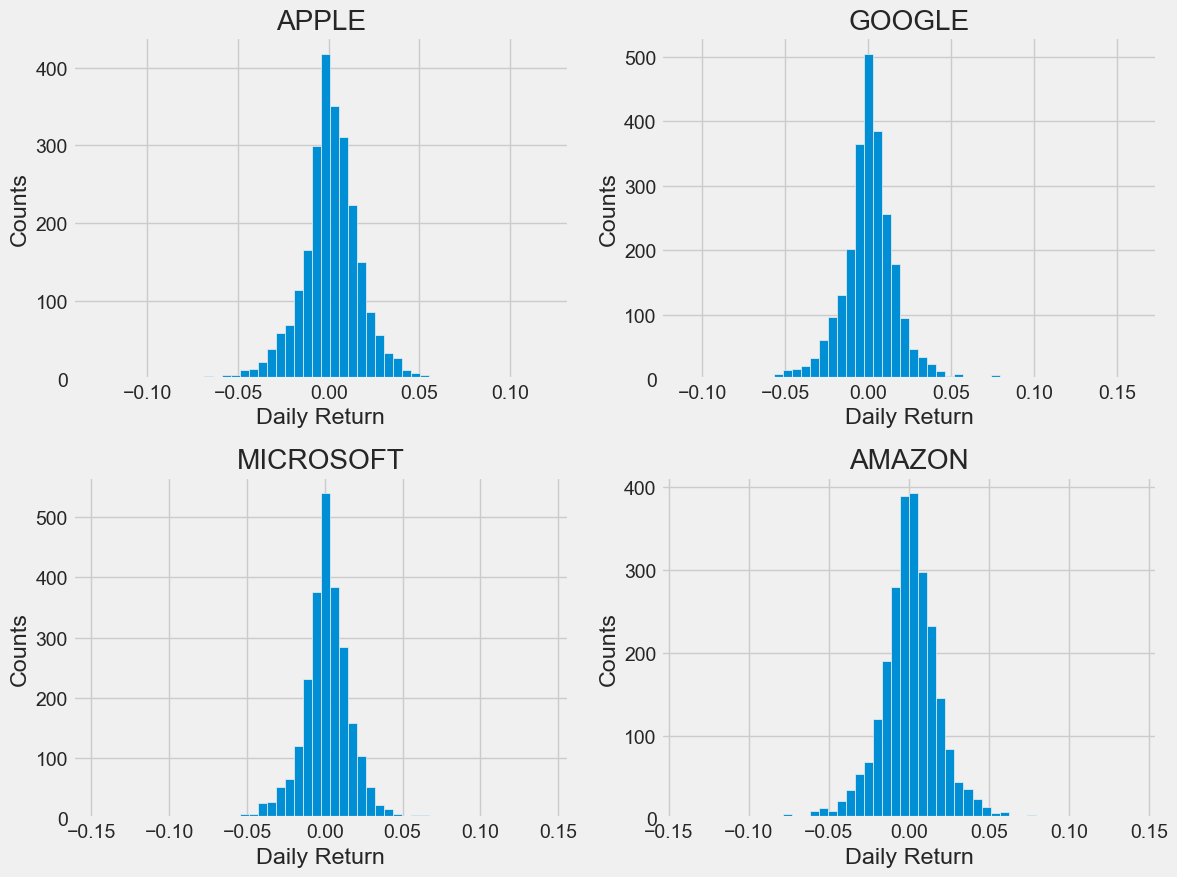

In [24]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

## Correlation Plot

In [25]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2013-09-11,NaN,NaN,NaN,NaN
2013-09-12,0.010648,-0.002603,-0.003493,-0.001527
2013-09-13,-0.016480,-0.003145,-0.004468,0.010401
2013-09-16,-0.031792,-0.006243,-0.001473,-0.006963
2013-09-17,0.011552,0.027393,-0.001859,0.003963


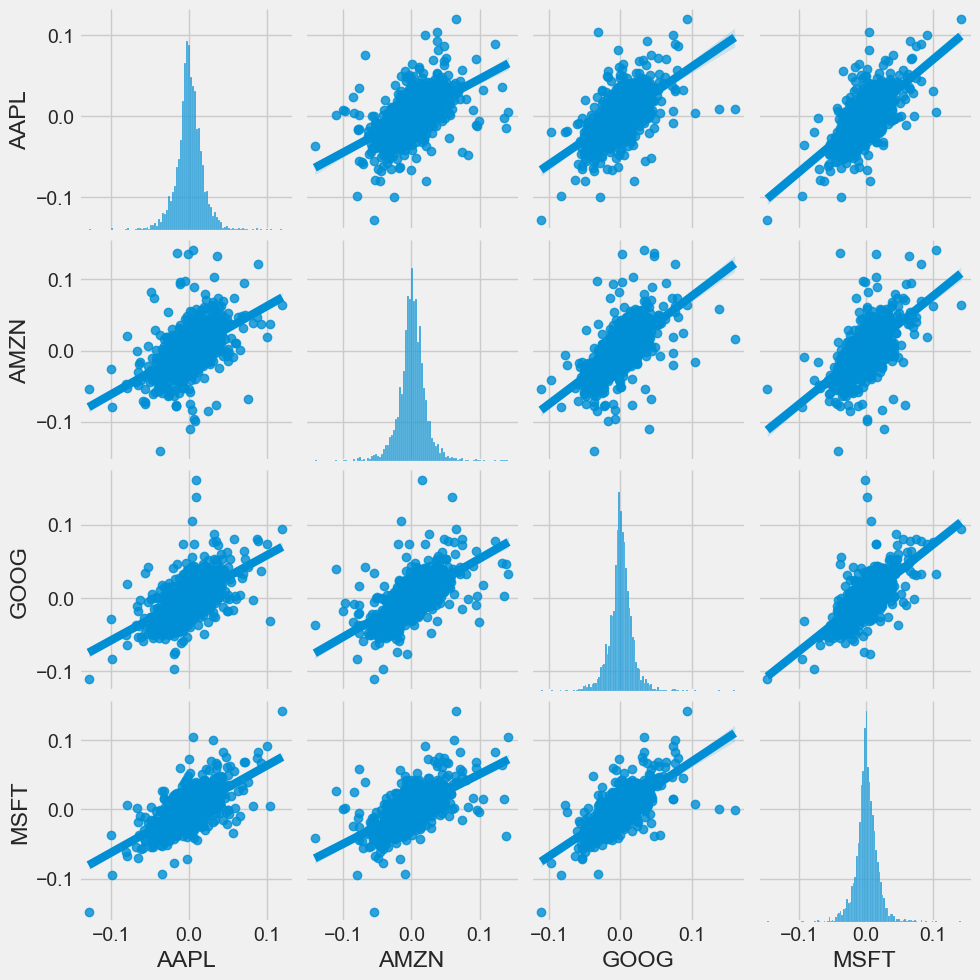

In [28]:
sns.pairplot(tech_rets, kind='reg')

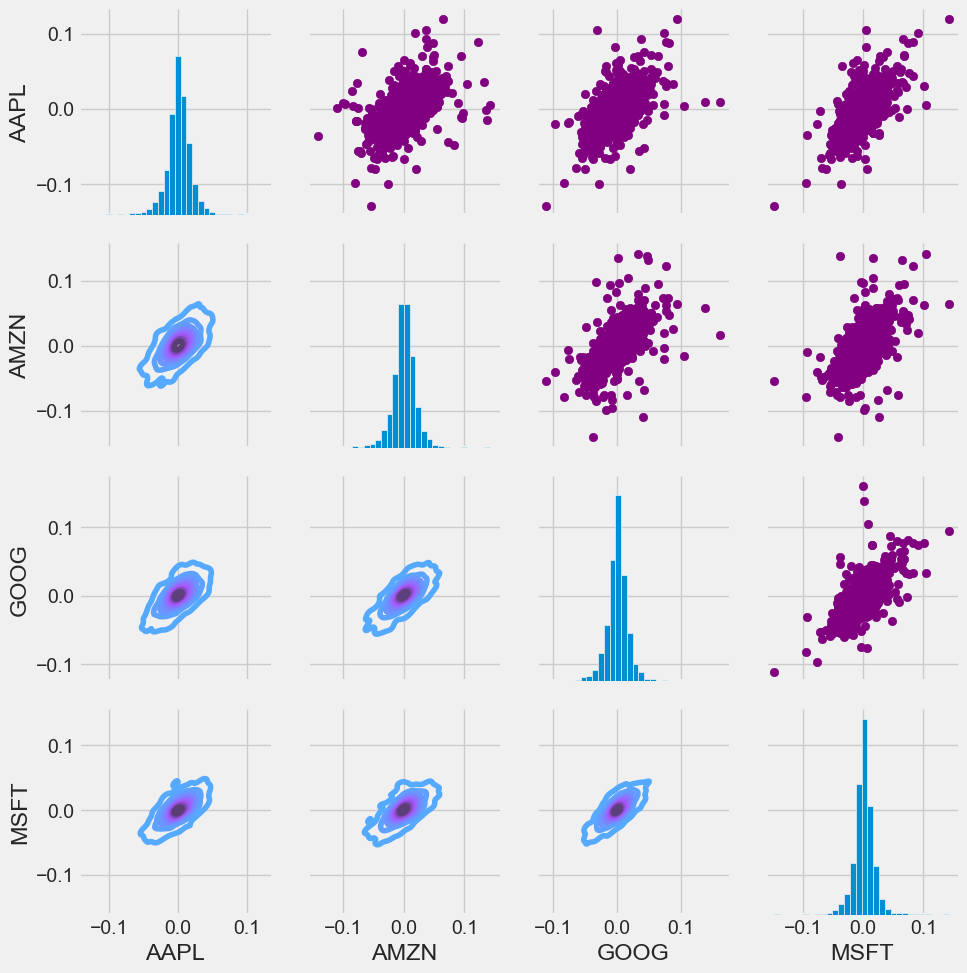

In [29]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

In [39]:
stock_return_corr = tech_rets.corr()

fig = px.imshow(stock_return_corr,
                color_continuous_scale='RdBu',
                labels=dict(x="Features", y="Features", color="Correlation"),
                title="Correlation Heatmap")

# Create annotations for correlation values
annotations = []
for i in range(len(stock_return_corr)):
    for j in range(len(stock_return_corr)):
        annotations.append(
            dict(
                x=stock_return_corr.columns[i],
                y=stock_return_corr.columns[j],
                text=str(round(stock_return_corr.iloc[i, j], 2)),
                showarrow=False,
                font=dict(color='white')
            )
        )

# Add annotations to the heatmap
fig.update_layout(annotations=annotations)

# Update layout
fig.update_layout(
    width=1000,
    height=800,
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    xaxis_zeroline=False,
    yaxis_zeroline=False,
)

fig.show()

In [40]:
closing_price_corr = closing_df.corr()

fig = px.imshow(stock_return_corr,
                color_continuous_scale='RdBu',
                labels=dict(x="Features", y="Features", color="Correlation"),
                title="Correlation Heatmap")

# Create annotations for correlation values
annotations = []
for i in range(len(stock_return_corr)):
    for j in range(len(stock_return_corr)):
        annotations.append(
            dict(
                x=stock_return_corr.columns[i],
                y=stock_return_corr.columns[j],
                text=str(round(stock_return_corr.iloc[i, j], 2)),
                showarrow=False,
                font=dict(color='white')
            )
        )

# Add annotations to the heatmap
fig.update_layout(annotations=annotations)

# Update layout
fig.update_layout(
    width=1000,
    height=800,
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    xaxis_zeroline=False,
    yaxis_zeroline=False,
)

fig.show()

## Investment Risk

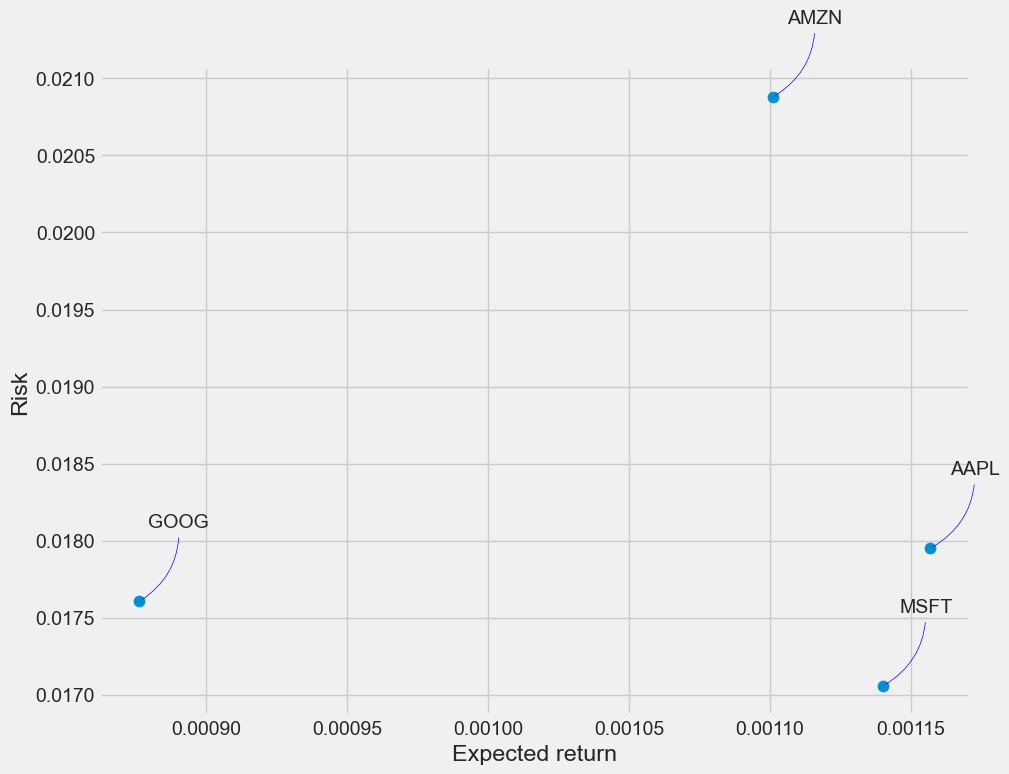

In [41]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [42]:
df

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2013-09-11,16.678928,16.917500,16.600357,16.703930,14.578370,898696400,APPLE
2013-09-12,16.732143,16.978571,16.643213,16.881786,14.733596,404051200,APPLE
2013-09-13,16.762142,16.851070,16.596430,16.603571,14.490782,298835600,APPLE
2013-09-16,16.464287,16.486071,15.972143,16.075714,14.030094,543706800,APPLE
2013-09-17,15.998571,16.418215,15.982143,16.261429,14.192179,399380800,APPLE
...,...,...,...,...,...,...,...
2023-09-01,139.460007,139.960007,136.880005,138.119995,138.119995,40948300,AMAZON
2023-09-05,137.729996,137.800003,135.820007,137.270004,137.270004,40636700,AMAZON
2023-09-06,136.320007,137.449997,134.610001,135.360001,135.360001,41785500,AMAZON
